In [1]:
import numpy as np
import pandas as pd

In [ ]:
import sklearn

print(sklearn.__version__)


In [2]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [ ]:
print(match.head(1))

In [ ]:
print(delivery.head(1))

In [3]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [4]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [5]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [6]:
print(match.shape)
print(match_df['team1'].unique())

(756, 18)
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [7]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [8]:


match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [9]:
match_df = match_df[match_df['dl_applied'] == 0]

In [10]:
match_df.shape

(626, 20)

In [11]:
match_df = match_df[['match_id','city','winner','total_runs']]
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [12]:
groups = delivery_df.groupby('match_id')['total_runs_y']
delivery_df['current_score'] = groups.transform(pd.Series.cumsum)
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [15]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


In [14]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
# Assuming delivery_df is your DataFrame
groups1 = delivery_df.groupby('match_id')['player_dismissed']
wickets = groups1.transform(pd.Series.cumsum).values
delivery_df['wickets'] = 10 - wickets


In [16]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [17]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

delivery_df['result'] = delivery_df.apply(result,axis=1)

In [18]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df = final_df.sample(final_df.shape[0])

final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
89601,Chennai Super Kings,Mumbai Indians,NaN,140,109,10,141,0.545455,7.706422,1


In [19]:
final_df.dropna(inplace=True)

In [20]:
final_df = final_df[final_df['balls_left'] != 0]

In [21]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
129951,Kings XI Punjab,Rajasthan Royals,Indore,57,32,6,160,7.022727,10.687500
109221,Royal Challengers Bangalore,Chennai Super Kings,Chennai,43,27,5,148,6.774194,9.555556
56805,Kings XI Punjab,Deccan Chargers,Dharamsala,185,109,9,198,7.090909,10.183486
102092,Rajasthan Royals,Delhi Daredevils,Delhi,184,115,10,184,0.000000,9.600000
41986,Deccan Chargers,Rajasthan Royals,Nagpur,117,93,9,159,9.333333,7.548387
...,...,...,...,...,...,...,...,...,...
54718,Delhi Daredevils,Mumbai Indians,Mumbai,165,88,6,178,2.437500,11.250000
36679,Royal Challengers Bangalore,Mumbai Indians,Mumbai,15,19,8,151,8.079208,4.736842
31022,Rajasthan Royals,Delhi Daredevils,Bloemfontein,143,109,9,150,3.818182,7.871560
71794,Mumbai Indians,Chennai Super Kings,Bangalore,38,1,1,187,7.512605,228.000000


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

/home/pd10/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8050318873081506

In [26]:
pipe.predict_proba(X_test)[10]

array([0.0271733, 0.9728267])

In [27]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [28]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [29]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,56.1,43.9
10467,2,8,0,50.6,49.4
10473,3,1,0,57.3,42.7
10479,4,7,1,69.0,31.0
10485,5,12,0,58.8,41.2
10491,6,13,0,46.4,53.6
10497,7,9,0,40.5,59.5
10505,8,15,0,26.8,73.2
10511,9,7,0,24.7,75.3
10518,10,17,0,13.5,86.5


Text(0.5, 1.0, 'Target-178')

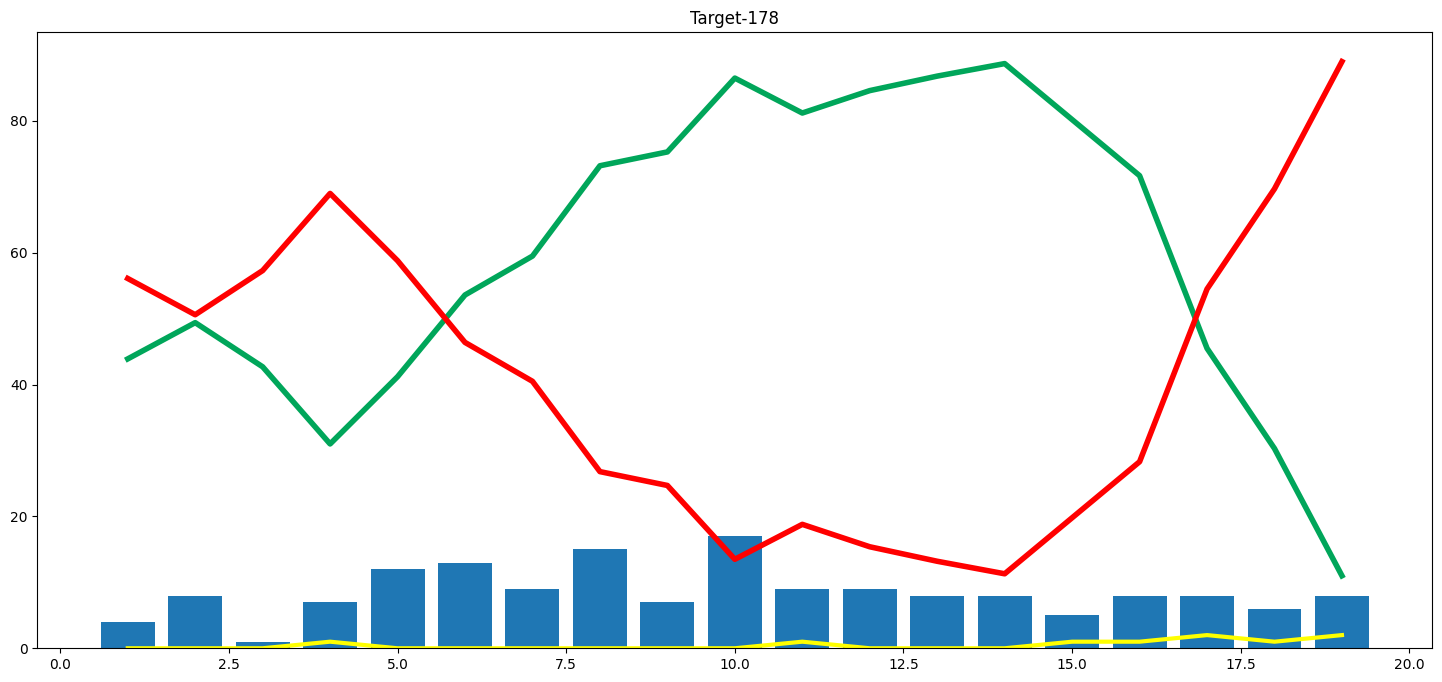

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [31]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))